In [105]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (AveragePooling2D, Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D) 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.python.keras import backend as k



In [106]:
CAPTCHA_DIR=os.path.join("data","data-new")
DIGITS_DIR=os.path.join("data","captcha-digits")

In [107]:
def loadData():
    x = []
    y = []
    for i in os.scandir(DIGITS_DIR):
        if i.is_dir():
            print("Processing for digit: ",i.name)
            for j in os.scandir(i.path):
                #print(j.name)
                img = cv2.imread(j.path,0)
#                 cv2.imshow("img", img)
#                 cv2.waitKey(1)
#                 img = np.reshape(img, (20*20))
                x.append(img)
#                 x.append(np.reshape(img, (length, width, -1)))
                label = i.name
                y.append(int(label))
    x = np.array(x)
    y = np.array(y)
#     cv2.destroyAllWindows()
    return x,y
        
X,Y = loadData()

Processing for digit:  9
Processing for digit:  0
Processing for digit:  7
Processing for digit:  6
Processing for digit:  1
Processing for digit:  8
Processing for digit:  4
Processing for digit:  3
Processing for digit:  2
Processing for digit:  5


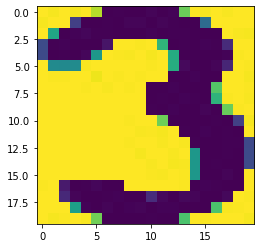

In [108]:
plt.imshow(X[4000])

In [109]:
print(X.shape,Y.shape)

(5395, 20, 20) (5395,)


In [110]:
# Flatten the images
image_vector_size = 20*20
X = X.reshape(X.shape[0], image_vector_size)
X.shape

(5395, 400)

In [111]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
yEnc = to_categorical(Y, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", yEnc[4000])

First 5 training lables as one-hot encoded vectors:
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [112]:
xtrain,xtest,ytrain,ytest = train_test_split(X,yEnc)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((4046, 400), (1349, 400), (4046, 10), (1349, 10))

In [118]:
input_shape = (400, ) #20*20
num_classes = 10 # ten unique digits

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model = Sequential([
    Dense(units=800, activation='sigmoid', input_shape=input_shape),
    Dense(units=800, activation='sigmoid', input_shape=input_shape),
    Dense(units=200, activation='sigmoid', input_shape=input_shape),
    Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 800)               320800    
_________________________________________________________________
dense_51 (Dense)             (None, 800)               640800    
_________________________________________________________________
dense_52 (Dense)             (None, 200)               160200    
_________________________________________________________________
dense_53 (Dense)             (None, 10)                2010      
Total params: 1,123,810
Trainable params: 1,123,810
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=500, epochs=30, verbose=True, validation_split=.2)

Train on 3236 samples, validate on 810 samples
Epoch 1/30
3236/3236 [==============================] - 3s 968us/sample - loss: 0.0879 - accuracy: 0.2262 - val_loss: 0.0800 - val_accuracy: 0.3988
Epoch 2/30
3236/3236 [==============================] - 1s 262us/sample - loss: 0.0717 - accuracy: 0.4960 - val_loss: 0.0574 - val_accuracy: 0.6247
Epoch 3/30
3236/3236 [==============================] - 1s 237us/sample - loss: 0.0489 - accuracy: 0.7423 - val_loss: 0.0370 - val_accuracy: 0.8049
Epoch 4/30
3236/3236 [==============================] - 1s 236us/sample - loss: 0.0310 - accuracy: 0.8239 - val_loss: 0.0252 - val_accuracy: 0.8222
Epoch 5/30
3236/3236 [==============================] - 1s 235us/sample - loss: 0.0205 - accuracy: 0.8900 - val_loss: 0.0180 - val_accuracy: 0.8975
Epoch 6/30
3236/3236 [==============================] - 1s 286us/sample - loss: 0.0141 - accuracy: 0.9221 - val_loss: 0.0138 - val_accuracy: 0.9198
Epoch 7/30
3236/3236 [==============================] - 1s 320us/

In [115]:
#Evaluating over Training Data
loss, accuracy  = model.evaluate(xtest, ytest, verbose=False)
loss ,accuracy

(0.0034037067676052795, 0.9799852)